In [1]:
# 📘 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import joblib  # For saving model

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/Users/joryalhumaydani/Desktop/phishing_site_urls.csv")

# Display the first 5 rows
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [3]:
# Number of rows and columns
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# Info about data types and nulls
df.info()

Number of rows: 549346
Number of columns: 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [4]:
df.describe(include='all')

,URL,Label
count,549346,549346
unique,507195,2
top,jhomitevd2abj3fk.tor2web.org/,good
freq,52,392924


In [5]:
print("Unique URLs:", df['URL'].nunique())
print("Unique Labels:", df['Label'].nunique())
print("Label types:", df['Label'].unique())

Unique URLs: 507195
Unique Labels: 2
Label types: ['bad' 'good']


In [6]:
label_counts = df['Label'].value_counts()
print(label_counts)

Label
good    392924
bad     156422
Name: count, dtype: int64


In [7]:
most_common_url = df['URL'].value_counts().idxmax()
frequency = df['URL'].value_counts().max()

print("Most frequent URL:", most_common_url)
print("Frequency:", frequency)

Most frequent URL: jhomitevd2abj3fk.tor2web.org/
Frequency: 52


In [8]:
# Extract domain part before first slash
df['Domain'] = df['URL'].apply(lambda url: url.split('/')[0])

# Preview
df['Domain'].head()

0              nobell.it
1        www.dghjdgf.com
2       serviciosbys.com
3     mail.printakid.com
4    thewhiskeydregs.com
Name: Domain, dtype: object

In [9]:
top_domains = df['Domain'].value_counts().head(10)
print(top_domains)


Domain
en.wikipedia.org    13206
youtube.com          8617
facebook.com         7735
amazon.com           4618
imdb.com             3470
linkedin.com         3427
tools.ietf.org       3190
myspace.com          2923
mylife.com           2822
manta.com            2075
Name: count, dtype: int64


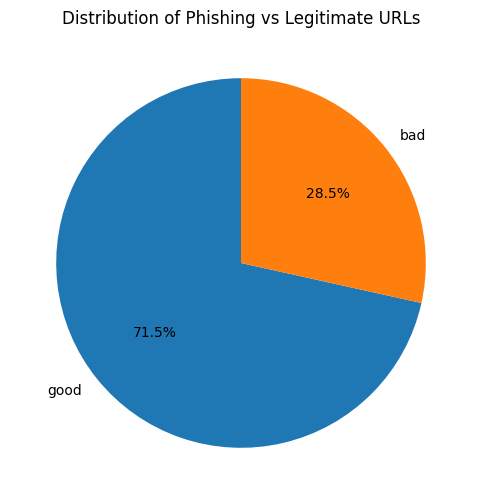

In [10]:
import matplotlib.pyplot as plt

label_counts = df['Label'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Phishing vs Legitimate URLs')
plt.show()


/var/folders/1l/wg2w3275265gzh32kyzdtyt80000gn/T/ipykernel_79560/228982111.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bad_domains.values, y=top_bad_domains.index, palette='Reds')


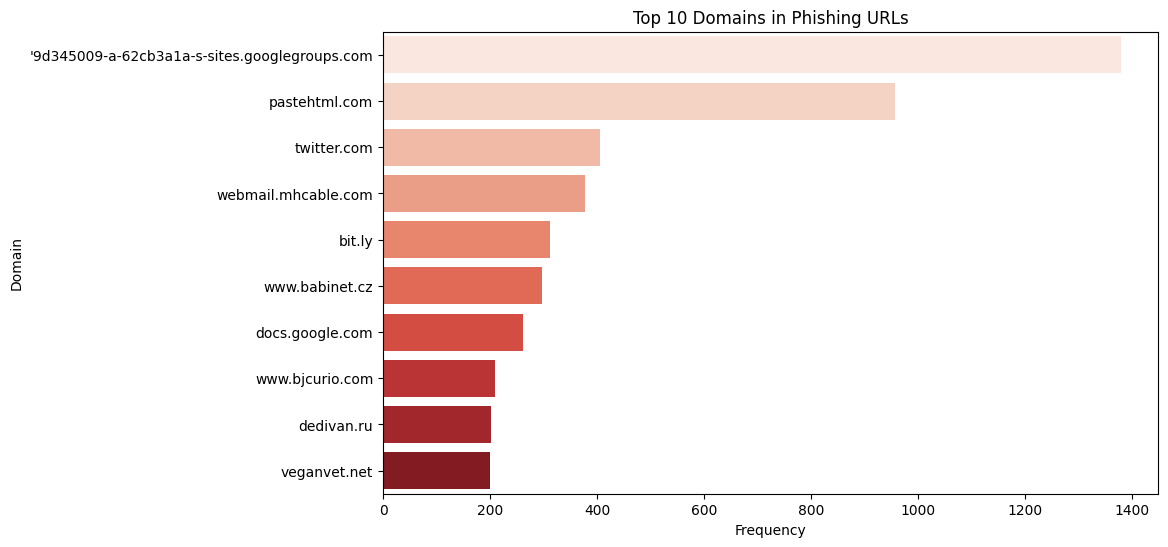

In [11]:
bad_urls = df[df['Label'] == 'bad']
top_bad_domains = bad_urls['Domain'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_bad_domains.values, y=top_bad_domains.index, palette='Reds')
plt.title('Top 10 Domains in Phishing URLs')
plt.xlabel('Frequency')
plt.ylabel('Domain')
plt.show()


/var/folders/1l/wg2w3275265gzh32kyzdtyt80000gn/T/ipykernel_79560/1515628131.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_domains.values, y=top_domains.index, palette='coolwarm')


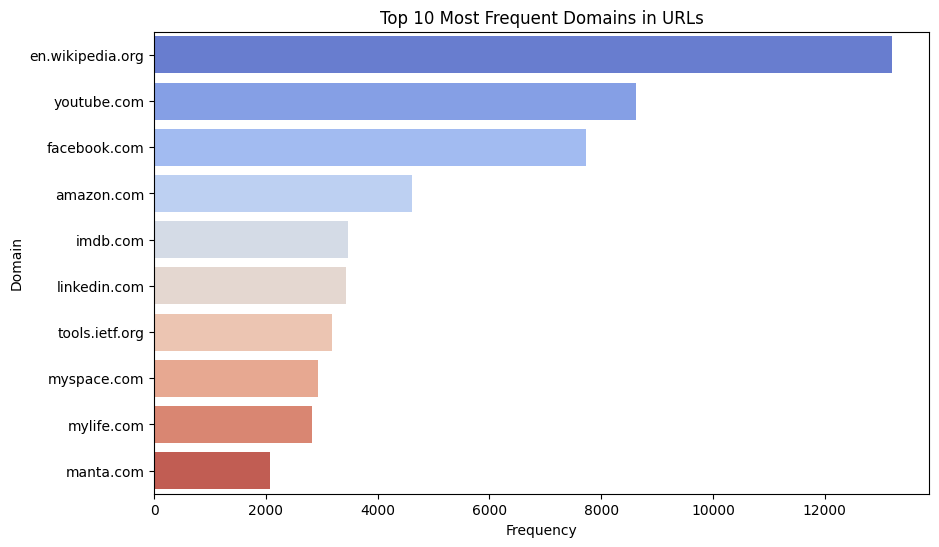

In [12]:
df['Domain'] = df['URL'].apply(lambda url: url.split('/')[0])

top_domains = df['Domain'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_domains.values, y=top_domains.index, palette='coolwarm')
plt.title('Top 10 Most Frequent Domains in URLs')
plt.xlabel('Frequency')
plt.ylabel('Domain')
plt.show()


In [13]:
# Encode labels: Good → 1 (Legit), Bad → 0 (Phishing)
df['Label'] = df['Label'].map({'good': 1, 'bad': 0})
print("\nEncoded Labels:\n", df['Label'].value_counts())


Encoded Labels:
 Label
1    392924
0    156422
Name: count, dtype: int64


In [14]:
df

,URL,Label,Domain
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,0,nobell.it
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,0,www.dghjdgf.com
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,0,serviciosbys.com
3,mail.printakid.com/www.online.americanexpress....,0,mail.printakid.com
4,thewhiskeydregs.com/wp-content/themes/widescre...,0,thewhiskeydregs.com
...,...,...,...
549341,23.227.196.215/,0,23.227.196.215
549342,apple-checker.org/,0,apple-checker.org
549343,apple-iclods.org/,0,apple-iclods.org
549344,apple-uptoday.org/,0,apple-uptoday.org


In [15]:
import re

def clean_url(url):
    url = url.lower()  # Convert to lowercase
    url = re.sub(r'https?:\/\/', '', url)  # Remove http or https
    url = re.sub(r'www\d*\.', '', url)     # Remove www or www2
    url = re.sub(r'[^a-z0-9\-\.\/]', ' ', url)  # Keep only allowed characters
    url = re.sub(r'\s+', ' ', url)         # Normalize spaces
    return url.strip()

df['clean_url'] = df['URL'].apply(clean_url)

In [16]:
# ✨ 5. Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer(
    token_pattern=r"(?u)\b\w+\b", 
    ngram_range=(1, 3), 
    max_features=5000
)

X = vectorizer.fit_transform(df['clean_url'])
y = df['Label']

In [17]:
# 🔀 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),  # خطي
    "Gradient Boosting": GradientBoostingClassifier(),  # تعزيز
    "K-Nearest Neighbors": KNeighborsClassifier(),  # قريب
    "Multinomial NB": MultinomialNB()  # احتمالي
}

In [24]:
results = []
for name, model in models.items():
    print(f"🔍 Training: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))
    print(f"✅ Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=["Phishing", "Legit"]))
    print("-" * 60)

🔍 Training: Logistic Regression
✅ Accuracy: 0.9279
              precision    recall  f1-score   support

    Phishing       0.94      0.80      0.86     31285
       Legit       0.92      0.98      0.95     78585

    accuracy                           0.93    109870
   macro avg       0.93      0.89      0.91    109870
weighted avg       0.93      0.93      0.93    109870

------------------------------------------------------------
🔍 Training: Gradient Boosting
✅ Accuracy: 0.8472
              precision    recall  f1-score   support

    Phishing       0.95      0.49      0.65     31285
       Legit       0.83      0.99      0.90     78585

    accuracy                           0.85    109870
   macro avg       0.89      0.74      0.77    109870
weighted avg       0.86      0.85      0.83    109870

------------------------------------------------------------
🔍 Training: K-Nearest Neighbors
✅ Accuracy: 0.9236
              precision    recall  f1-score   support

    Phishing      

In [25]:
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"]).sort_values(by="Accuracy", ascending=False)
results_df

,Model,Accuracy
0,Logistic Regression,0.927924
2,K-Nearest Neighbors,0.923637
3,Multinomial NB,0.918795
1,Gradient Boosting,0.847174


✅ Accuracy: 0.9279239100755439

📄 Classification Report:
               precision    recall  f1-score   support

    Phishing       0.94      0.80      0.86     31285
       Legit       0.92      0.98      0.95     78585

    accuracy                           0.93    109870
   macro avg       0.93      0.89      0.91    109870
weighted avg       0.93      0.93      0.93    109870



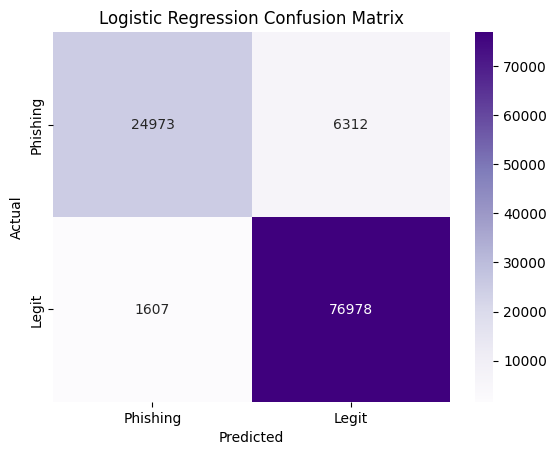

In [26]:
# 🧠 Train Logistic Regression Model
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# 📊 Evaluate Model
y_pred = lr_model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred, target_names=["Phishing", "Legit"]))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples',
            xticklabels=['Phishing', 'Legit'], yticklabels=['Phishing', 'Legit'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

✅ Accuracy: 0.847164831164103

📄 Classification Report:
               precision    recall  f1-score   support

    Phishing       0.95      0.49      0.65     31285
       Legit       0.83      0.99      0.90     78585

    accuracy                           0.85    109870
   macro avg       0.89      0.74      0.77    109870
weighted avg       0.86      0.85      0.83    109870



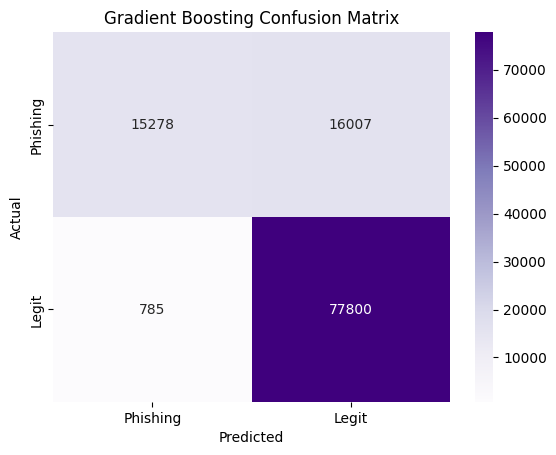

In [30]:
# 🧠  Train Gradient Boosting Model
from sklearn.tree import DecisionTreeClassifier

dt_model = GradientBoostingClassifier()
dt_model.fit(X_train, y_train)

# 📊 8. Evaluate Model
y_pred = dt_model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred, target_names=["Phishing", "Legit"]))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples',
            xticklabels=['Phishing', 'Legit'], yticklabels=['Phishing', 'Legit'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Gradient Boosting Confusion Matrix")
plt.show()

✅ Accuracy: 0.9236370255756804

📄 Classification Report:
               precision    recall  f1-score   support

    Phishing       0.90      0.82      0.86     31285
       Legit       0.93      0.96      0.95     78585

    accuracy                           0.92    109870
   macro avg       0.92      0.89      0.90    109870
weighted avg       0.92      0.92      0.92    109870



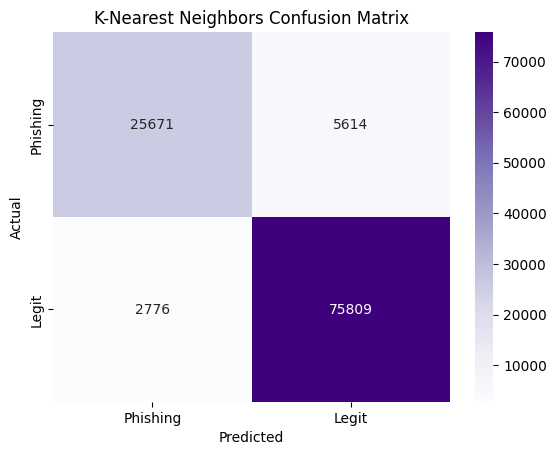

In [28]:
# 🧠 Train K-Nearest Neighbors Model
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# 📊 Evaluate Model
y_pred = knn_model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred, target_names=["Phishing", "Legit"]))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples',
            xticklabels=['Phishing', 'Legit'], yticklabels=['Phishing', 'Legit'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("K-Nearest Neighbors Confusion Matrix")
plt.show()

✅ Accuracy: 0.9187949394739238

📄 Classification Report:
               precision    recall  f1-score   support

    Phishing       0.93      0.78      0.84     31285
       Legit       0.92      0.98      0.95     78585

    accuracy                           0.92    109870
   macro avg       0.92      0.88      0.89    109870
weighted avg       0.92      0.92      0.92    109870



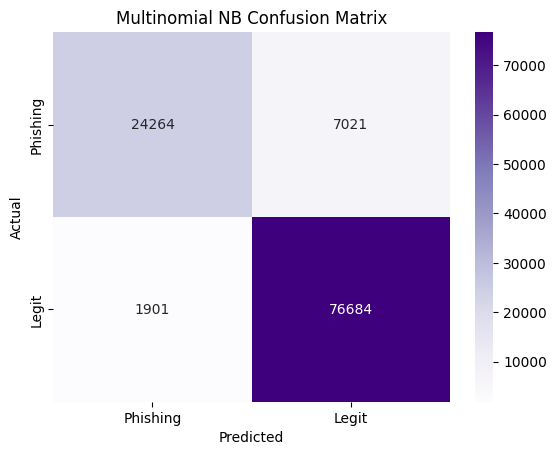

In [29]:
# 🧠 Train Multinomial NB Model
from sklearn.ensemble import ExtraTreesClassifier

et_model = MultinomialNB()
et_model.fit(X_train, y_train)

# 📊 Evaluate Model
y_pred = et_model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred, target_names=["Phishing", "Legit"]))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples',
            xticklabels=['Phishing', 'Legit'], yticklabels=['Phishing', 'Legit'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Multinomial NB Confusion Matrix")
plt.show()

In [35]:
sample_urls = [
    "http://login-verification-update.com",
    "https://www.paypal.com",
    "http://free-prize.ru",
    "https://www.apple.com",
    "http://password-reset-verify.org",
    "https://google.com",
    "http://bank-security-alert.co",
    "https://netflix-login-verification.com",
    "http://update-account-info.ru",
    "https://github.com"
]

# 🧹 Clean URLs
cleaned_urls = [clean_url(url) for url in sample_urls]

# 🔡 TF-IDF Vectorize
sample_features = vectorizer.transform(cleaned_urls)

In [36]:
# Predict classes (0 = phishing, 1 = legit)
predictions = lr_model.predict(sample_features)

# Predict probabilities (optional)
probabilities = lr_model.predict_proba(sample_features)[:, 1]  # Confidence for class 1 (Legit)

In [37]:
for url, pred, prob in zip(sample_urls, predictions, probabilities):
    label = "✅ Legit" if pred == 1 else "⚠️ Phishing"
    print(f"{url} => {label} ({prob * 100:.2f}%)")

http://login-verification-update.com => ⚠️ Phishing (0.00%)
https://www.paypal.com => ⚠️ Phishing (0.03%)
http://free-prize.ru => ⚠️ Phishing (11.38%)
https://www.apple.com => ✅ Legit (88.00%)
http://password-reset-verify.org => ⚠️ Phishing (5.46%)
https://google.com => ✅ Legit (77.29%)
http://bank-security-alert.co => ⚠️ Phishing (11.01%)
https://netflix-login-verification.com => ⚠️ Phishing (0.60%)
http://update-account-info.ru => ⚠️ Phishing (0.20%)
https://github.com => ✅ Legit (69.20%)


In [38]:
# 💾 10. Save Model & Vectorizer
joblib.dump(lr_model, "logistic_regression_phishing_model.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer_lr.pkl")
print("Model and vectorizer saved.")

Model and vectorizer saved.
